### Jaitin et al. Science

Data is downloaded from this source
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE54006

In [70]:
# !wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE54nnn/GSE54006/suppl/GSE54006_experimental_design.txt.gz
# !wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE54nnn/GSE54006/suppl/GSE54006_readme0421.txt
# !wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE54nnn/GSE54006/suppl/GSE54006_umitab.txt.gz

In [3]:
import pandas as pd
import anndata
import scanpy as sc

In [48]:
df = pd.read_csv('GSE54006_experimental_design.txt.gz', skiprows=6, sep='\t', index_col=0)
df.shape

In [27]:
X = pd.read_csv('GSE54006_umitab.txt.gz', sep='\t', index_col=0).T

In [33]:

adata = anndata.AnnData(X)
adata.shape

In [55]:
obs = df.reindex(adata.obs_names.str.split('_').str[1].astype(int))
adata.obs = obs

In [62]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [65]:
adata.obs

,sequencing_batch,amplification_batch,mouse_ID,pool_barcode,sample_barcode,plate_id,well_id,number_of_cells,sorting_markers,RMT_length,group_name,ERCC_dilution,ERCC_volume_ul,Column_name_in_processed_data_file
1,1,0,NaN,NNNNNN,CTACCA,1.0,A1,1,CD11c+,4,CD11c+,0.000020,0.01,0_1
2,1,0,NaN,NNNNNN,CATGCT,1.0,B1,1,CD11c+,4,CD11c+,0.000020,0.01,0_2
3,1,0,NaN,NNNNNN,GCACAT,1.0,C1,1,CD11c+,4,CD11c+,0.000020,0.01,0_3
4,1,0,NaN,NNNNNN,TGCTCG,1.0,D1,1,CD11c+,4,CD11c+,0.000020,0.01,0_4
5,1,0,NaN,NNNNNN,AGCAAT,1.0,E1,1,CD11c+,4,CD11c+,0.000020,0.01,0_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,21,43,5.0,CGAGCA,GCATTG,32.0,H24,1,CD11c+,4,CD11c+(2hr_LPS),0.000025,0.01,43_6160
6161,21,43,5.0,CGAGCA,GGCTAA,32.0,J24,1,CD11c+,4,CD11c+(2hr_LPS),0.000025,0.01,43_6161
6162,21,43,5.0,CGAGCA,CTGTGA,32.0,L24,1,CD11c+,4,CD11c+(2hr_LPS),0.000025,0.01,43_6162
6163,21,43,5.0,CGAGCA,CATGCA,32.0,N24,1,CD11c+,4,CD11c+(2hr_LPS),0.000025,0.01,43_6163


In [67]:
sc.set_figure_params(facecolor='white')

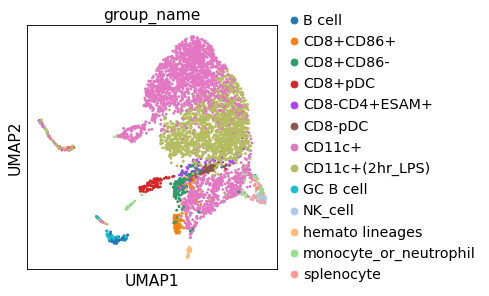

In [69]:
sc.pl.umap(adata, color='group_name')

In [74]:
import numpy as np

In [81]:
adata.obs['perturbation.type'] = np.where(adata.obs['group_name'].str.contains('LPS'), 'chemical', np.nan)
adata.obs['perturbation.description'] = np.where(adata.obs['group_name'].str.contains('LPS'), 'LPS (2 hours)', np.nan)
adata.obs['perturbation.value'] = np.where(adata.obs['group_name'].str.contains('LPS'), True, np.nan)
adata.obs['perturbation.unit'] = np.where(adata.obs['group_name'].str.contains('LPS'), 'boolean', np.nan)

In [82]:
adata.obs

,sequencing_batch,amplification_batch,mouse_ID,pool_barcode,sample_barcode,plate_id,well_id,number_of_cells,sorting_markers,RMT_length,group_name,ERCC_dilution,ERCC_volume_ul,Column_name_in_processed_data_file,perturbation.type,perturbation.description,perturbation.value,perturbation.unit
1,1,0,NaN,NNNNNN,CTACCA,1.0,A1,1,CD11c+,4,CD11c+,0.000020,0.01,0_1,nan,nan,NaN,nan
2,1,0,NaN,NNNNNN,CATGCT,1.0,B1,1,CD11c+,4,CD11c+,0.000020,0.01,0_2,nan,nan,NaN,nan
3,1,0,NaN,NNNNNN,GCACAT,1.0,C1,1,CD11c+,4,CD11c+,0.000020,0.01,0_3,nan,nan,NaN,nan
4,1,0,NaN,NNNNNN,TGCTCG,1.0,D1,1,CD11c+,4,CD11c+,0.000020,0.01,0_4,nan,nan,NaN,nan
5,1,0,NaN,NNNNNN,AGCAAT,1.0,E1,1,CD11c+,4,CD11c+,0.000020,0.01,0_5,nan,nan,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,21,43,5.0,CGAGCA,GCATTG,32.0,H24,1,CD11c+,4,CD11c+(2hr_LPS),0.000025,0.01,43_6160,chemical,LPS (2 hours),1.0,boolean
6161,21,43,5.0,CGAGCA,GGCTAA,32.0,J24,1,CD11c+,4,CD11c+(2hr_LPS),0.000025,0.01,43_6161,chemical,LPS (2 hours),1.0,boolean
6162,21,43,5.0,CGAGCA,CTGTGA,32.0,L24,1,CD11c+,4,CD11c+(2hr_LPS),0.000025,0.01,43_6162,chemical,LPS (2 hours),1.0,boolean
6163,21,43,5.0,CGAGCA,CATGCA,32.0,N24,1,CD11c+,4,CD11c+(2hr_LPS),0.000025,0.01,43_6163,chemical,LPS (2 hours),1.0,boolean


In [83]:
adata.write('../../data/preprocessing_output/jaitin_et_al_science.h5ad', compression='lzf')

... storing 'perturbation.type' as categorical
... storing 'perturbation.description' as categorical
... storing 'perturbation.unit' as categorical
